In [1]:
import pandas as pd 
data=pd.read_csv("titanic_preprocessed.csv")

In [2]:
data

,age,sibsp,parch,fare,0,1,2,3,4,5,6,7,survived
0,2.301222,-0.534894,-0.474556,4.246850,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,-1.127599,8.541409,1.993135,0.644773,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
2,-0.270394,-0.534894,-0.474556,0.401702,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
3,-0.121314,-0.534894,-0.474556,0.401702,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
4,0.176844,-0.534894,-0.474556,0.401702,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0.773161,-0.534894,-0.474556,-0.650261,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
1205,1.444017,-0.534894,-0.474556,-0.650261,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
1206,-0.121314,-0.534894,-0.474556,-0.650261,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
1207,-0.121314,-0.534894,-0.474556,-0.650261,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0


In [3]:
from sklearn.model_selection import train_test_split

X=data.iloc[:, 0:len(data.columns)-1]
Y=data.loc[:, ['survived']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,random_state=42)

In [4]:
print(Y.size)
print(Y_train.size)
print(Y_test.size)

1209
1088
121


In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model= Sequential()
model.add(Dense(16,input_dim=len(X_train.columns),activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(Y_train.columns),activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="mse",optimizer="rmsprop",metrics=['mae'])

In [7]:
parameters = ['validation_split', 'epochs', 'batch_size']
validation_split_list = [0.1, 0.2, 0.3, 0.4, 0.5]
epochs_list = [10, 50, 100, 150, 200]
batch_size_list = [4, 8, 12, 16, 20]
param_value_dict = {}
param_value_dict[parameters[0]] = validation_split_list
param_value_dict[parameters[1]] = epochs_list
param_value_dict[parameters[2]] = batch_size_list

In [8]:
param_value_dict

{'validation_split': [0.1, 0.2, 0.3, 0.4, 0.5],
 'epochs': [10, 50, 100, 150, 200],
 'batch_size': [4, 8, 12, 16, 20]}

In [9]:
models = {}
results = {}

validation_split_list = [0.1, 0.2, 0.3, 0.4, 0.5]
models['compare_validation_split'] = {}
results['compare_validation_split'] = {}
for vs in validation_split_list:
    results['compare_validation_split'][vs] = model.fit(X_train,Y_train,validation_split=vs,epochs=50,batch_size=8)
    model.save('model/titanic/compare_validation_split/{}.h5'.format(vs))

epochs_list = [10, 50, 100, 150, 200]
models['compare_epochs'] = {}
results['compare_epochs'] = {}
for epochs in epochs_list:
    results['compare_epochs'][epochs] = model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs,batch_size=8)
    model.save('model/titanic/compare_epochs/{}.h5'.format(epochs))

batch_size_list = [4, 8, 12, 16, 20]
models['compare_batch_size'] = {}
results['compare_batch_size'] = {}
for batch_size in batch_size_list:
    results['compare_batch_size'][batch_size] = model.fit(X_train,Y_train,validation_split=0.2,epochs=50,batch_size=batch_size)
    model.save('model/titanic/compare_batch_size/{}.h5'.format(batch_size))

Epoch 1/50
123/123 [==============================] - 0s 2ms/step - loss: 0.2567 - mae: 0.4819 - val_loss: 0.2246 - val_mae: 0.4681
Epoch 2/50
123/123 [==============================] - 0s 606us/step - loss: 0.2398 - mae: 0.4619 - val_loss: 0.2168 - val_mae: 0.4590
Epoch 3/50
123/123 [==============================] - 0s 603us/step - loss: 0.2343 - mae: 0.4559 - val_loss: 0.2079 - val_mae: 0.4473
Epoch 4/50
123/123 [==============================] - 0s 589us/step - loss: 0.2282 - mae: 0.4448 - val_loss: 0.2008 - val_mae: 0.4355
Epoch 5/50
123/123 [==============================] - 0s 656us/step - loss: 0.2153 - mae: 0.4240 - val_loss: 0.1922 - val_mae: 0.4242
Epoch 6/50
123/123 [==============================] - 0s 603us/step - loss: 0.2105 - mae: 0.4176 - val_loss: 0.1860 - val_mae: 0.4129
Epoch 7/50
123/123 [==============================] - 0s 616us/step - loss: 0.2183 - mae: 0.4230 - val_loss: 0.1814 - val_mae: 0.4074
Epoch 8/50
123/123 [==============================] - 0s 602us/s

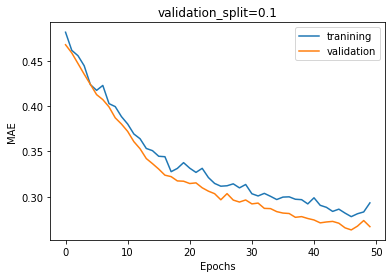

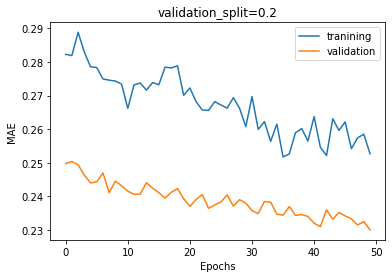

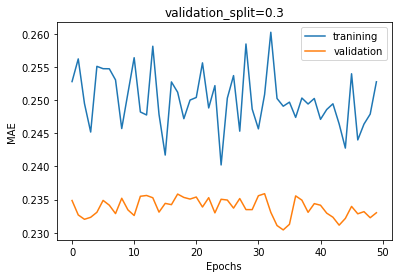

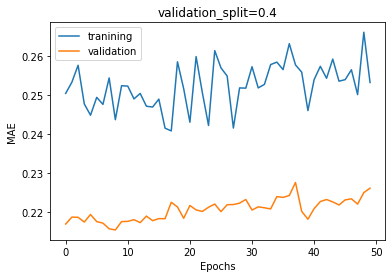

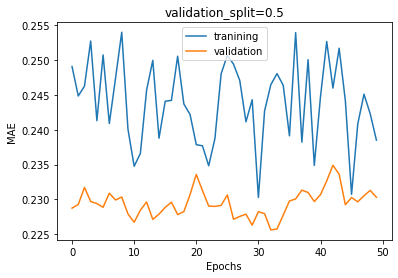

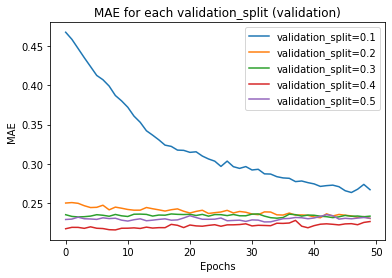

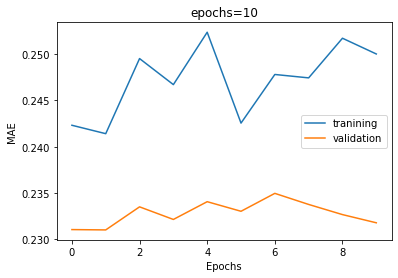

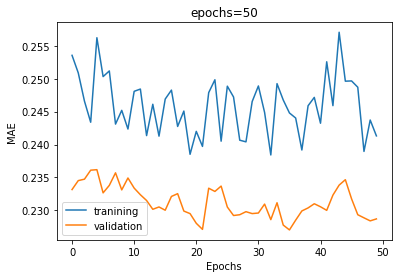

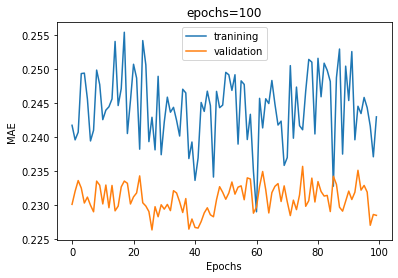

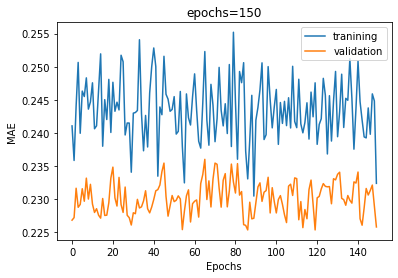

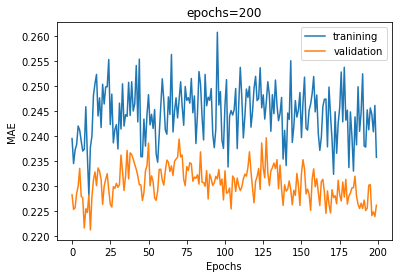

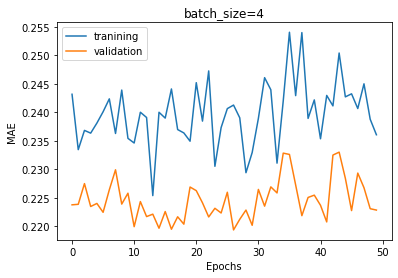

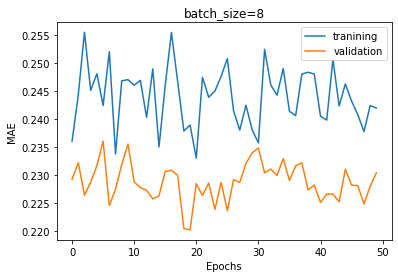

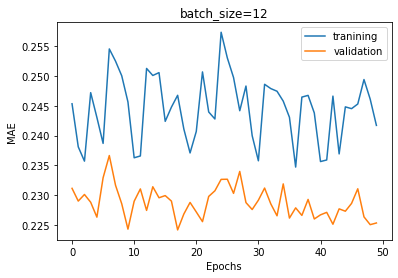

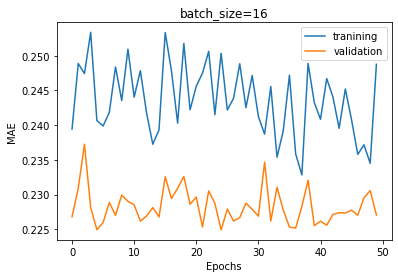

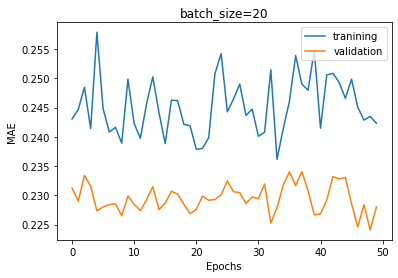

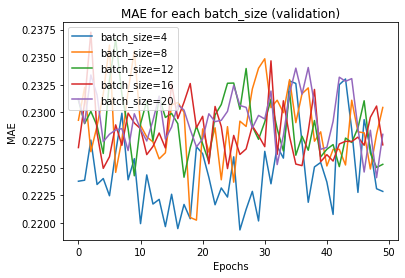

In [10]:
import matplotlib.pyplot as plt

for param in parameters:
    for param_value, result in results['compare_{}'.format(param)].items():
        plt.plot(result.history['mae'],label="tranining")
        plt.plot(result.history['val_mae'],label="validation")
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.title('{}={}'.format(param, str(param_value)))
        plt.legend()
        plt.show()
    
    if param != 'epochs':
        # fig = plt.figure()
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        for param_value, result in results['compare_{}'.format(param)].items():
            plt.plot(result.history['val_mae'],label='{}={}'.format(param, str(param_value)))
        plt.title('MAE for each {} (validation)'.format(param))
        plt.legend()
        plt.show()

In [12]:
from keras.models import load_model

results = {}
for param in parameters:
    results['compare_{}'.format(param)] = {}
    for param_value in param_value_dict[param]:
        model = load_model('model/titanic/compare_{}/{}.h5'.format(param, param_value))
        results['compare_{}'.format(param)][param_value] = model.evaluate(X_test,Y_test,batch_size=8)

16/16 [==============================] - 0s 466us/step - loss: 0.1437 - mae: 0.2221


In [13]:
results

{'compare_validation_split': {0.1: [0.1328383982181549, 0.2501542866230011],
  0.2: [0.1392153650522232, 0.22344814240932465],
  0.3: [0.1376647800207138, 0.21908311545848846],
  0.4: [0.14086738228797913, 0.22501687705516815],
  0.5: [0.1389702707529068, 0.22019019722938538]},
 'compare_epochs': {10: [0.14142249524593353, 0.22051197290420532],
  50: [0.13992373645305634, 0.21586795151233673],
  100: [0.14208385348320007, 0.21898101270198822],
  150: [0.14447186887264252, 0.21515198051929474],
  200: [0.14273999631404877, 0.21728631854057312]},
 'compare_batch_size': {4: [0.14618268609046936, 0.21461188793182373],
  8: [0.14311839640140533, 0.22510236501693726],
  12: [0.14478866755962372, 0.2185155749320984],
  16: [0.14595358073711395, 0.22208210825920105],
  20: [0.14371997117996216, 0.22214818000793457]}}

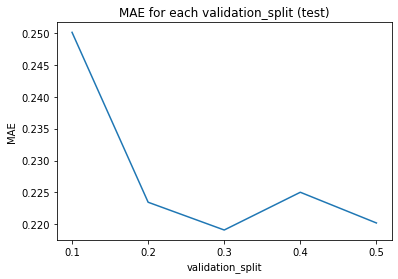

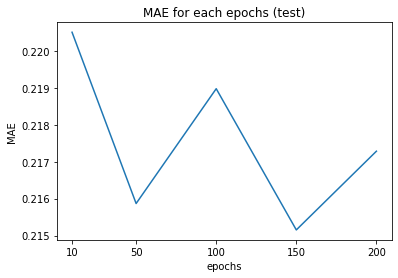

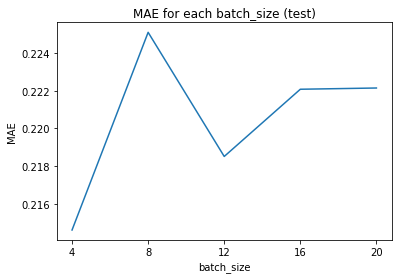

In [14]:
for param in parameters:
    fig = plt.figure()
    plt.title('MAE for each {} (test)'.format(param))
    plt.xlabel(param)
    plt.ylabel('MAE')
    x = list(results['compare_{}'.format(param)].keys())
    y = [performance[1] for param_value, performance in results['compare_{}'.format(param)].items()]
    plt.plot(x, y)
    plt.xticks(x)
    plt.show()
    file_path = 'compare_{}.png'.format(param)
    fig.savefig(file_path)